# Advanced: Recovering the 12-6 Lennard-Jones Potential

This tutorial expands upon the previous 12-6 LJ tutorial.  Here, we will attempt to recover not only epsilon and sigma, but also the two exponents.

---

As in the previous tutorial we create a target potential of the 12-6 LJ form with sigma and epsilon values of 5.0.

Text(0,0.5,'U')

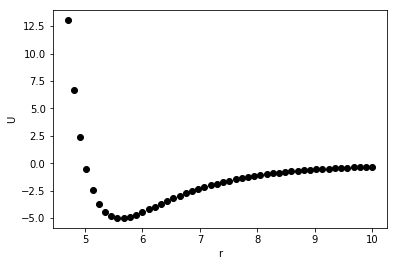

In [1]:
import numpy as np

from nanoparticle_optimization.forcefield import Mie, Parameter
from nanoparticle_optimization.target import Target

sigma_target = Parameter(value=5.0, fixed=True)
epsilon_target = Parameter(value=5.0, fixed=True)
n_target = Parameter(value=12.0, fixed=True)
m_target = Parameter(value=6.0, fixed=True)

mie_target = Mie(sigma=sigma_target, epsilon=epsilon_target, n=n_target, m=m_target)

separations = np.linspace(4.7, 10.0, 50)
potential = mie_target.calc_potential(separations)
target = Target(separations=separations, potential=potential)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(separations, potential, linestyle='None', marker='o', color='black')
plt.xlabel('r')
plt.ylabel('U')

Again we define the `Forcefield` that we want to optimize.  However this time we are not setting `n` or `m` to be fixed.

In [2]:
import mbuild as mb

from nanoparticle_optimization.system import System

point_particle = mb.Compound(pos=np.zeros(3))
system = System(point_particle)

sigma = Parameter(value=2.5, upper=10.0, lower=2.0)
epsilon = Parameter(value=2.0, upper=10.0, lower=2.0)
n = Parameter(value=15.0, upper=25.0, lower=10.0)
m = Parameter(value=3.0, upper=8.0, lower=2.0)
ff = Mie(sigma=sigma, epsilon=epsilon, n=n, m=m)

Now we'll again run optimization using the default Nelder-Mead simplex algorithm.

In [3]:
from nanoparticle_optimization.optimization import Optimization

optimization = Optimization(ff, system, target, configurations=1)
optimization.optimize(brute_force=False, verbose=True)

epsilon: 2.0

m: 3.0

n: 15.0

sigma: 2.5

Residual: 0.8701858337623529


epsilon: 2.1

m: 3.0

n: 15.0

sigma: 2.5

Residual: 0.8642200491426134


epsilon: 2.0

m: 3.1500000000000004

n: 15.0

sigma: 2.5

Residual: 0.8837399265574313


epsilon: 2.0

m: 3.0

n: 15.75

sigma: 2.5

Residual: 0.8730318295666885


epsilon: 2.0

m: 3.0

n: 15.0

sigma: 2.625

Residual: 0.8515380373171068


epsilon: 2.05

m: 2.8499999999999996

n: 15.375

sigma: 2.5625

Residual: 0.8436625592740638


epsilon: 2.0749999999999993

m: 2.6999999999999993

n: 15.5625

sigma: 2.59375

Residual: 0.8206484504897213


epsilon: 2.0874999999999995

m: 2.8499999999999996

n: 14.53125

sigma: 2.609375

Residual: 0.8298965552513823


epsilon: 2.1312499999999996

m: 2.7749999999999995

n: 15.046875

sigma: 2.6640625

Residual: 0.8117709540126098


epsilon: 2.1968749999999995

m: 2.6624999999999996

n: 15.0703125

sigma: 2.74609375

Residual: 0.778206612273907


epsilon: 2.079687499999999

m: 2.6062499999999993

n: 15.08203

/Users/summeraz/src/github/summeraz/nanoparticle_optimization/nanoparticle_optimization/forcefield.py:100: RuntimeWarning: invalid value encountered in double_scalars
  C = (n / (n - m)) * ((n / m) ** (m / (n - m)))


epsilon: 2.598691272735592

m: 0.9626003265380837

n: 14.980854749679565

sigma: 3.6386648416519165

Residual: 0.3880959386721426


epsilon: 2.6470167636871302

m: 1.3118619918823224

n: 14.84571397304535

sigma: 3.2521055340766907

Residual: 0.42919326341217046


epsilon: 2.7112044930458015

m: 0.4448188304901094

n: 15.098216861486435

sigma: 3.8858408480882645

Residual: 0.3856491010756175


epsilon: 2.7913015663623755

m: 0.34655778408050253

n: 14.068043991923332

sigma: 4.097444094717503

Residual: 0.38806120867591337


epsilon: 2.9181940048932953

m: -0.02838510274887418

n: 14.303559131920338

sigma: 4.151280757039785

Residual: nan


epsilon: 2.678566955775018

m: 0.7148539692163443

n: 14.811530845239758

sigma: 3.7668188204988837

Residual: 0.3800291475944937


epsilon: 2.6692164059728336

m: 0.7718055322766277

n: 15.588113316334784

sigma: 3.52718886686489

Residual: 0.386152826986175


epsilon: 2.4693063968792517

m: 0.9749585263431044

n: 15.397400436457247

sigma: 3.474

epsilon: 3.2593801771592052

m: 2.207884525371721

n: 6.170576034817781

sigma: 4.0217995459937255

Residual: 0.31718641760306043


epsilon: 3.3267611198442752

m: 2.1136870013970075

n: 6.545603027819077

sigma: 4.086120472059097

Residual: 0.3161314116290545


epsilon: 3.3978984056090664

m: 2.2170626285229935

n: 6.195693480460246

sigma: 3.9883767710601363

Residual: 0.3142687083574214


epsilon: 3.547020733993153

m: 2.1776122858283644

n: 6.4041381816629475

sigma: 3.9926849216481646

Residual: 0.3118286014370769


epsilon: 3.557532043728384

m: 2.140427078820281

n: 7.003016048597

sigma: 3.925945066488275

Residual: 0.312735721845989


epsilon: 3.6359991295147225

m: 1.7927016830969191

n: 8.077499266932998

sigma: 4.149784689129573

Residual: 0.3181772935875541


epsilon: 3.7361020348900276

m: 1.9911473273303004

n: 7.311475600324979

sigma: 4.096018433324026

Residual: 0.312446446535753


epsilon: 3.447708836713197

m: 2.4187351635910574

n: 5.554617162269004

sigma: 3.90059


m: 3.4777349039074004

n: 5.27740977457163

sigma: 2.9046236767967804

Residual: 0.2846799546219282


epsilon: 9.777231896484246

m: 3.57620204003405

n: 4.893380467714403

sigma: 2.884845179413202

Residual: 0.28508487693744194


epsilon: 9.816865856582742

m: 3.50226527532922

n: 5.163936642196262

sigma: 2.8702323029871115

Residual: 0.28454106509220833


epsilon: 9.721125848993232

m: 3.588352008931837

n: 4.813356160645304

sigma: 2.82838715989

Residual: 0.28484896790893766


epsilon: 9.827589538447288

m: 3.5053891801635095

n: 5.161396371090049

sigma: 2.8855645475700853

Residual: 0.2843211471896642


epsilon: 10.453793438799712

m: 3.567320038160038

n: 5.193538932927328

sigma: 2.8304248288883587

Residual: 0.2841778101365582


epsilon: 10.999288620083188

m: 3.600492902319739

n: 5.297666670112781

sigma: 2.797181149471383

Residual: 0.28469276549831674


epsilon: 10.536264968917342

m: 3.540690219073533

n: 5.393835835318595

sigma: 2.8368820972215283

Residual: 0.2847816


m: 3.9578509006200626

n: 4.797743699692983

sigma: 2.7359058479944514

Residual: 0.28346407970813436


epsilon: 12.470139820869079

m: 3.97806327999427

n: 4.79740533736479

sigma: 2.734680226871827

Residual: 0.2834453908692691


epsilon: 12.600621357097463

m: 4.0049390714842605

n: 4.7814881257639925

sigma: 2.733951600351036

Residual: 0.28342782548479784


epsilon: 12.84794323334966

m: 4.054285403558198

n: 4.767772632992404

sigma: 2.731710250086877

Residual: 0.2834055824518362


epsilon: 12.521362776983352

m: 3.983413846283878

n: 4.849742832930475

sigma: 2.7482575258129756

Residual: 0.28335894371239956


epsilon: 12.578974898347695

m: 3.9901493246538617

n: 4.899764009183416

sigma: 2.7590584552325117

Residual: 0.2832957891413673


epsilon: 12.508433753178227

m: 3.9812895527799377

n: 4.905999792167659

sigma: 2.7640175059784853

Residual: 0.2833068826934598


epsilon: 13.13819628943746

m: 4.105623555973208

n: 4.8139792466872695

sigma: 2.7382472534195665

Residual:


m: 4.062947520425075

n: 5.427833944212653

sigma: 2.864201782263782

Residual: 0.28295559945034365


epsilon: 13.175827443422545

m: 4.059108629335125

n: 5.460237211377998

sigma: 2.870045560587272

Residual: 0.2829552011333325


epsilon: 13.198925744304681

m: 4.06384077868532

n: 5.4563667853035955

sigma: 2.869528441558312

Residual: 0.2829643854829255


epsilon: 13.155384914916734

m: 4.0560949639781665

n: 5.449220818566769

sigma: 2.8680240167209288

Residual: 0.2829552571369841


epsilon: 13.142782162639303

m: 4.054466667176518

n: 5.446274043915155

sigma: 2.8676386374115124

Residual: 0.2829533673266693


epsilon: 13.122604129210792

m: 4.051388461018

n: 5.442230405763961

sigma: 2.866983171356468

Residual: 0.2829523226920094


epsilon: 13.112627281212733

m: 4.046362696541461

n: 5.479999650695703

sigma: 2.8737771192156725

Residual: 0.2829526044779566


epsilon: 13.118926999796198

m: 4.048349119270016

n: 5.474002192406052

sigma: 2.8728314360058977

Residual: 0.2829


m: 3.934257259623193

n: 5.211882815123186

sigma: 2.934866100042497

Residual: 0.28187034388858806


epsilon: 11.053117181366282

m: 4.142687995748355

n: 4.761496674045036

sigma: 2.910407197839345

Residual: 0.28203538919601234


epsilon: 10.797368982200972

m: 4.046872045941678

n: 4.934182402981159

sigma: 2.92648866373185

Residual: 0.2817098303854291


epsilon: 9.930476297961135

m: 3.8473234174649056

n: 5.333448365944761

sigma: 2.992776122624405

Residual: 0.28152446613067195


epsilon: 9.64388020689485

m: 3.921749101946525

n: 5.080601059152617

sigma: 2.990604012866347

Residual: 0.28126492019934923


epsilon: 9.037108950502063

m: 3.915495023108191

n: 5.014960181167332

sigma: 3.018472969278272

Residual: 0.2822336292326033


epsilon: 9.127189556721241

m: 3.7465728436304637

n: 5.431510799380373

sigma: 3.031039123744243

Residual: 0.2832110754851288


epsilon: 10.379824125831039

m: 3.971797245363874

n: 5.058514502080962

sigma: 2.9526262787349484

Residual: 0.281452

epsilon: 2.742597087451479

m: 6.980601342570974

n: 7.038782848594742

sigma: 5.315993456956058

Residual: 0.2467441889756606


epsilon: 2.283704921460778

m: 6.817788682080496

n: 7.200897180120123

sigma: 5.310625519083063

Residual: 0.26782998083347054


epsilon: 4.06562212586152

m: 6.096257656686294

n: 6.576497428325144

sigma: 4.714638924700482

Residual: 0.19474581252762724


epsilon: 3.014692998654861

m: 6.636836676553701

n: 7.367330589585485

sigma: 5.215762470277653

Residual: 0.18314163744703768


epsilon: 3.1750720491971727

m: 6.666958428867183

n: 7.523717436507427

sigma: 5.253101247251466

Residual: 0.20265290440865802


epsilon: 3.4543909077135564

m: 6.3391639497845365

n: 6.8079617438702655

sigma: 4.921266286804908

Residual: 0.17811310026582136


epsilon: 2.3513315081473554

m: 6.922053042153664

n: 7.632328678946056

sigma: 5.45243063692592

Residual: 0.3509859853058081


epsilon: 3.6370494714329786

m: 6.302706503053137

n: 6.840455240980372

sigma: 4.8990868


m: 5.6644081569013025

n: 8.919009271964583

sigma: 5.0186718619184365

Residual: 0.0966986036830359


epsilon: 4.608485306682874

m: 5.622700780620616

n: 9.072268118480304

sigma: 5.033396863545392

Residual: 0.09546139302714444


epsilon: 4.634976369360064

m: 5.589684319691988

n: 9.117698324780658

sigma: 5.02677514306016

Residual: 0.0950559992362823


epsilon: 4.661339501987927

m: 5.552902296411313

n: 9.189614351478891

sigma: 5.024529265239568

Residual: 0.09486344281736507


epsilon: 4.614075402485621

m: 5.553096955185708

n: 9.198192401022038

sigma: 5.029848010310629

Residual: 0.09476617836524492


epsilon: 4.6098394964041844

m: 5.504216473123471

n: 9.301228811238971

sigma: 5.031285794109058

Residual: 0.09447730862156402


epsilon: 4.628814405311901

m: 5.522011940126702

n: 9.232524209509242

sigma: 5.022368054760842

Residual: 0.09480587979421035


epsilon: 4.745147568182262

m: 5.4446792266874215

n: 9.409408331202888

sigma: 5.019570340845887

Residual: 0.095152

epsilon: 4.602232411968822

m: 5.232075933980294

n: 9.81442192622931

sigma: 5.023838324292629

Residual: 0.09331544977412214


epsilon: 4.615732196842915

m: 5.2329246016585245

n: 9.815707306714579

sigma: 5.0235493319369695

Residual: 0.09330287047750745


epsilon: 4.597567467989164

m: 5.244585785098149

n: 9.78748762225404

sigma: 5.023725709546476

Residual: 0.09335794818657225


epsilon: 4.593273809308165

m: 5.228311970442157

n: 9.820191466859175

sigma: 5.024083222245912

Residual: 0.09333157984184043


epsilon: 4.606079156610017

m: 5.243164496559254

n: 9.793408921396825

sigma: 5.023829518429395

Residual: 0.09330858705592493


epsilon: 4.618438889049132

m: 5.2238852975681205

n: 9.834492666879992

sigma: 5.023524523769501

Residual: 0.09332847898410825


epsilon: 4.625202677608035

m: 5.232100936439553

n: 9.820046315021312

sigma: 5.023488699977365

Residual: 0.09337329164333032


epsilon: 4.599970180624819

m: 5.232056919115745

n: 9.813901978183308

sigma: 5.02387562


m: 5.251769806914499

n: 9.778149863458987

sigma: 5.023651863733949

Residual: 0.09329560668237764


epsilon: 4.6144023318946115

m: 5.251813458586103

n: 9.777994166579116

sigma: 5.023655700855462

Residual: 0.09329479188119244


epsilon: 4.61439273962612

m: 5.252994864435509

n: 9.775638139006926

sigma: 5.0236575269764865

Residual: 0.09329511204213099


epsilon: 4.614494524864794

m: 5.251503556566551

n: 9.77863507243212

sigma: 5.023653965284701

Residual: 0.09329477518708995


epsilon: 4.614495576186462

m: 5.252026153128083

n: 9.777584727979097

sigma: 5.0236526111074

Residual: 0.09329458368833421


epsilon: 4.614519071229779

m: 5.252130248514037

n: 9.777375426140509

sigma: 5.0236506911392524

Residual: 0.09329488581670063


epsilon: 4.6145884525376015

m: 5.252137004169148

n: 9.77738917375624

sigma: 5.023651816421603

Residual: 0.09329494855204078


epsilon: 4.614448862055359

m: 5.251894344981864

n: 9.777842918373398

sigma: 5.023654729746998

Residual: 0.09329470

sigma = 5.024
epsilon = 4.615
n = 9.777
m = 5.252


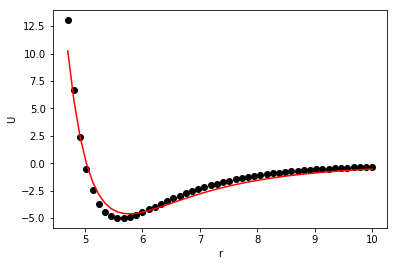

In [4]:
matched_potential = np.array([optimization.forcefield.calc_potential(r) for r in separations])

plt.plot(separations, potential, linestyle='None', marker='o', color='black')
plt.plot(separations, matched_potential, marker='None', color='red')
plt.xlabel('r')
plt.ylabel('U')

print('sigma = {:.3f}'.format(optimization.forcefield['sigma']))
print('epsilon = {:.3f}'.format(optimization.forcefield['epsilon']))
print('n = {:.3f}'.format(optimization.forcefield['n']))
print('m = {:.3f}'.format(optimization.forcefield['m']))

We can see that the optimization did an okay job, but was not quite able to recover the correct values. Instead, we appear to have settled into a local minimum.

Let's perform the optimization again, but this time using a two stage optimization, where first we will perform brute force optimization, evaluating the residual over a series of grid points defined by the parameter space, and then we will perform polishing using the Nelder-Mead algorithm.

Since we are evaluating 10 x 10 x 10 x 10 parameter combinations, the output can cause the notebook to become very laggy, so we'll go ahead and set the `verbose` argument to False. This cell make take a few minutes to execute.

In [5]:
point_particle = mb.Compound(pos=np.zeros(3))
system = System(point_particle)

sigma = Parameter(value=2.5, upper=10.0, lower=2.0)
epsilon = Parameter(value=2.0, upper=10.0, lower=2.0)
n = Parameter(value=15.0, upper=25.0, lower=10.0)
m = Parameter(value=3.0, upper=8.0, lower=2.0)
ff = Mie(sigma=sigma, epsilon=epsilon, n=n, m=m)

optimization = Optimization(ff, system, target, configurations=1)
optimization.optimize(brute_force=True, verbose=False)

The parameter grid that we performed the brute force search over is defined in the `grid` attribute.

In [6]:
optimization.grid

array([[[[[ 2.        ,  2.        ,  2.        , ...,  2.        ,
            2.        ,  2.        ],
          [ 2.        ,  2.        ,  2.        , ...,  2.        ,
            2.        ,  2.        ],
          [ 2.        ,  2.        ,  2.        , ...,  2.        ,
            2.        ,  2.        ],
          ...,
          [ 2.        ,  2.        ,  2.        , ...,  2.        ,
            2.        ,  2.        ],
          [ 2.        ,  2.        ,  2.        , ...,  2.        ,
            2.        ,  2.        ],
          [ 2.        ,  2.        ,  2.        , ...,  2.        ,
            2.        ,  2.        ]],

         [[ 2.        ,  2.        ,  2.        , ...,  2.        ,
            2.        ,  2.        ],
          [ 2.        ,  2.        ,  2.        , ...,  2.        ,
            2.        ,  2.        ],
          [ 2.        ,  2.        ,  2.        , ...,  2.        ,
            2.        ,  2.        ],
          ...,
          [ 2.

The optimization also stores the residual calculated at each grid point.

In [7]:
optimization.grid_residuals

array([[[[0.78961795, 0.62031409, 0.46815193, ..., 0.98842707,
          0.9965884 , 0.99882804],
         [0.802234  , 0.64040172, 0.48628637, ..., 0.99435331,
          0.99859384, 0.99958585],
         [0.81178537, 0.65544915, 0.5013228 , ..., 0.99733862,
          0.99944076, 0.99985904],
         ...,
         [0.83675944, 0.69578598, 0.54697681, ..., 0.9999545 ,
          0.99999596, 0.99999953],
         [0.83958326, 0.70042312, 0.55265684, ..., 0.99998058,
          0.99999855, 0.99999986],
         [0.84203287, 0.70445772, 0.55763599, ..., 0.99999178,
          0.99999948, 0.99999996]],

        [[0.88242745, 0.7259181 , 0.53492688, ..., 0.99002878,
          0.99708274, 0.99900245],
         [0.89228091, 0.74552472, 0.56096631, ..., 0.99507114,
          0.99877712, 0.99964086],
         [0.89925285, 0.75981488, 0.5814353 , ..., 0.99764843,
          0.99950725, 0.99987595],
         ...,
         [0.91663284, 0.79654651, 0.63825311, ..., 0.9999582 ,
          0.9999963 , 0.9

Let's see how well the two-step optimization performed.

sigma = 5.000
epsilon = 5.000
n = 12.000
m = 6.000


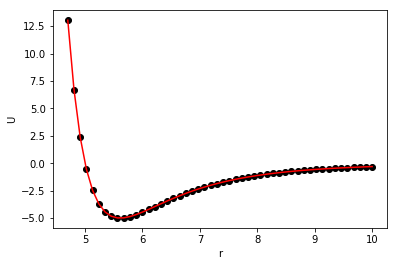

In [8]:
matched_potential = np.array([optimization.forcefield.calc_potential(r) for r in separations])

plt.plot(separations, potential, linestyle='None', marker='o', color='black')
plt.plot(separations, matched_potential, marker='None', color='red')
plt.xlabel('r')
plt.ylabel('U')

print('sigma = {:.3f}'.format(optimization.forcefield['sigma']))
print('epsilon = {:.3f}'.format(optimization.forcefield['epsilon']))
print('n = {:.3f}'.format(optimization.forcefield['n']))
print('m = {:.3f}'.format(optimization.forcefield['m']))

With the addition of a brute-force stage, we were able to recapture `sigma`, `epsilon`, `n`, and `m` exactly.